# Load the data set

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
data, target = iris.data, iris.target

# Split the data set

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(target, test_size=0.2, random_state=42)

# Standardize the data

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modify target data to represent probabilities

In [4]:
import numpy as np

def make_probability(num_labels, label):
    return [1 if i == label else 0 for i in range(num_labels)]

num_labels = 3
y_train = [make_probability(num_labels, label) for label in y_train]
y_test = [make_probability(num_labels, label) for label in y_test]

y_train = np.array(y_train)
y_test = np.array(y_test)

# Initialize the model

In [5]:
from neural_network.functions.loss_functions import CrossEntropy
from neural_network.functions.activation_functions import ReLU, Softmax
from neural_network.neural_network import NeuralNetwork

hidden_layer_sizes = [4, 3]
hidden_layer_activations = [Softmax()]
loss_function = CrossEntropy()

model = NeuralNetwork(hidden_layer_sizes, hidden_layer_activations, loss_function)

learning_rate = 0.01
regularization_rate = 0.01
momentum = 0.9

# Train the model   

In [6]:
def predict(y_pred):
    return np.argmax(y_pred)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 10/100 - Loss: 3.2326 - Accuracy: 0.8500
Epoch 20/100 - Loss: 3.1182 - Accuracy: 0.8583
Epoch 30/100 - Loss: 2.8782 - Accuracy: 0.8750
Epoch 40/100 - Loss: 2.9433 - Accuracy: 0.8667
Epoch 50/100 - Loss: 2.8782 - Accuracy: 0.8750
Epoch 60/100 - Loss: 2.8782 - Accuracy: 0.8750
Epoch 70/100 - Loss: 2.8782 - Accuracy: 0.8750
Epoch 80/100 - Loss: 2.8782 - Accuracy: 0.8750
Epoch 90/100 - Loss: 2.8782 - Accuracy: 0.8750
Epoch 100/100 - Loss: 2.9285 - Accuracy: 0.8667


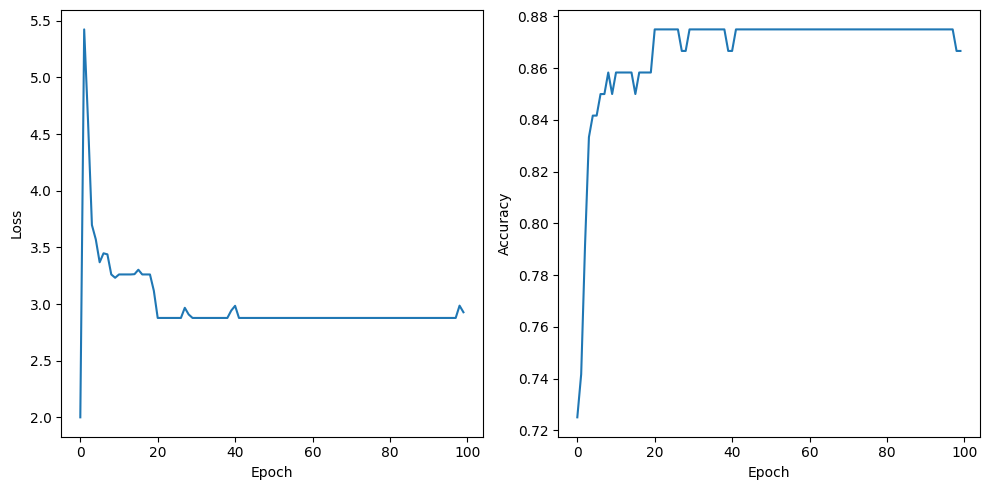

In [9]:
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

model.reset()

loss_values = []
accuracy_values = []

num_epochs = 100
for epoch in tqdm(range(num_epochs)):
    total_loss = 0
    total_accuracy = 0

    for x, y in zip(X_train, y_train):
        y_pred = model.forward(x)

        loss = model.get_loss(y, y_pred)
        total_loss += loss

        model.backward(y)
        model.apply_gradients(learning_rate, regularization_rate, momentum)

        choice = predict(y_pred)
        total_accuracy += 1 if choice == np.argmax(y) else 0

    total_loss /= len(y_train)
    loss_values.append(total_loss)
    total_accuracy /= len(y_train)
    accuracy_values.append(total_accuracy)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{num_epochs} - Loss: {total_loss:.4f} - Accuracy: {total_accuracy:.4f}")


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(loss_values)
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")

ax[1].plot(accuracy_values)
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")

plt.tight_layout()
plt.show()